In [ ]:
import pickle
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.models import Sequential
import matplotlib.pyplot as plt

In [ ]:
from keras.applications.densenet import DenseNet121
from keras.applications.nasnet import NASNetMobile

In [ ]:
import pickle
import numpy as np
pickle_in=open('/content/drive/My Drive/CLASS Project/balanced_image_data.pickle','rb')
dataset=pickle.load(pickle_in)
pickle_in.close()
dataset=np.array(dataset)
print(dataset.shape)
dataset=dataset/255.0
dataset=np.repeat(dataset,3,-1)
print(dataset.shape)



dataset=dataset.reshape((10342,100,100,3))
print(dataset.shape)

(10342, 100, 100)
(10342, 100, 300)
(10342, 100, 100, 3)


In [ ]:
pickle_in=open('/content/drive/My Drive/CLASS Project/balanced_label.pickle','rb')
label=pickle.load(pickle_in)
pickle_in.close()
label=np.array(label)

In [ ]:
IMG_SIZE=[100,100]
den=DenseNet121(input_shape=IMG_SIZE+[3],weights='imagenet',include_top=False)

for layer in den.layers:
  layer.trainable=False
x=Flatten()(den.output)
prediction=Dense(3,activation='softmax')(x)
model = Model(inputs=den.input, outputs=prediction)





In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 106, 106, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 50, 50, 64)   9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 50, 50, 64)   256         conv1/conv[0][0]                 
_______________________________________________________________________________________

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.690719 to fit



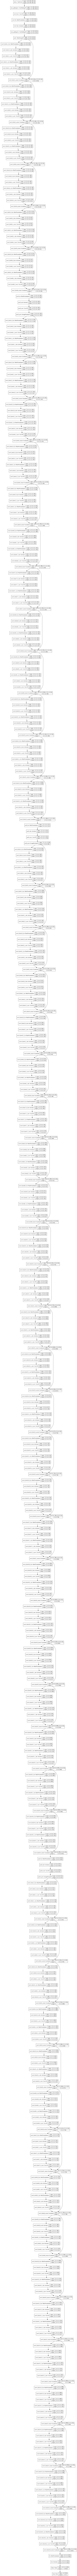

In [ ]:
keras.utils.plot_model(model,to_file='/content/drive/My Drive/CLASS Project/DenseNet121.png',show_shapes=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset,label,stratify=label,test_size=0.1,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)


(9307, 100, 100, 3)
(1035, 100, 100, 3)
(9307,)
(1035,)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9307, 100, 100, 3)
(1035, 100, 100, 3)
(9307, 3)
(1035, 3)


In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(
  loss='categorical_crossentropy',
  optimizer=opt,
  metrics=['accuracy']
)

In [ ]:
hist=model.fit(X_train,y_train,epochs=20,validation_split=0.1,verbose=1)

Epoch 1/20
262/262 [==============================] - 9s 33ms/step - loss: 80.2372 - accuracy: 0.6615 - val_loss: 106.7087 - val_accuracy: 0.6391
Epoch 2/20
262/262 [==============================] - 7s 25ms/step - loss: 96.1133 - accuracy: 0.6625 - val_loss: 55.0127 - val_accuracy: 0.6391
Epoch 3/20
262/262 [==============================] - 7s 25ms/step - loss: 53.3560 - accuracy: 0.6712 - val_loss: 36.6985 - val_accuracy: 0.6982
Epoch 4/20
262/262 [==============================] - 7s 25ms/step - loss: 66.7186 - accuracy: 0.6588 - val_loss: 102.8895 - val_accuracy: 0.6380
Epoch 5/20
262/262 [==============================] - 7s 25ms/step - loss: 64.6131 - accuracy: 0.6705 - val_loss: 35.2465 - val_accuracy: 0.6982
Epoch 6/20
262/262 [==============================] - 7s 25ms/step - loss: 79.6612 - accuracy: 0.6568 - val_loss: 14.5192 - val_accuracy: 0.6982
Epoch 7/20
262/262 [==============================] - 7s 25ms/step - loss: 71.4519 - accuracy: 0.6632 - val_loss: 170.5923 - val

In [ ]:
model.evaluate(X_test,y_test)

33/33 [==============================] - 1s 30ms/step - loss: 132.2351 - accuracy: 0.6725


[132.2350616455078, 0.6724637746810913]

In [ ]:
a=X_test[555]
print(a.shape)
a=np.expand_dims(a,0)

(100, 100, 3)


In [ ]:
y_test[555]

array([0., 0., 1.], dtype=float32)

In [ ]:
print(np.argmax(model.predict(a))+1)

2


In [ ]:
model.save('/content/drive/My Drive/CLASS Project/DenseNet121.h5')

Text(0.5, 0, 'accuracy')

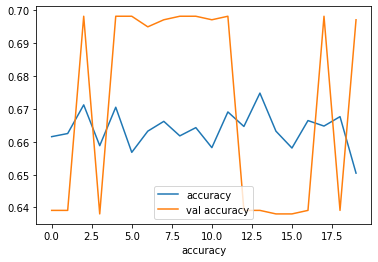

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'],label='val accuracy')
plt.legend()
plt.xlabel('accuracy')

Text(0.5, 0, 'loss')

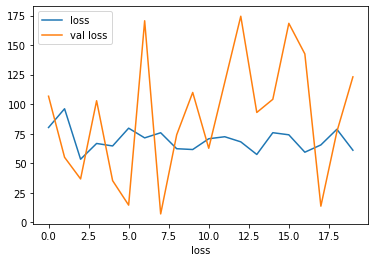

In [ ]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val loss')
plt.legend()
plt.xlabel('loss')

### NASANET


In [ ]:
from keras.applications.xception import Xception

In [ ]:
IMG_SIZE=[100,100]
xcep=Xception(input_shape=IMG_SIZE+[3],weights='imagenet',include_top=False)

for layer in xcep.layers:
  layer.trainable=False
x=Flatten()(xcep.output)
prediction=Dense(3,activation='softmax')(x)
model = Model(inputs=xcep.input, outputs=prediction)

83689472/83683744 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 49, 49, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 49, 49, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 49, 49, 32)   0           block1_conv1_bn[0][0]            
_______________________________________________________________________________________

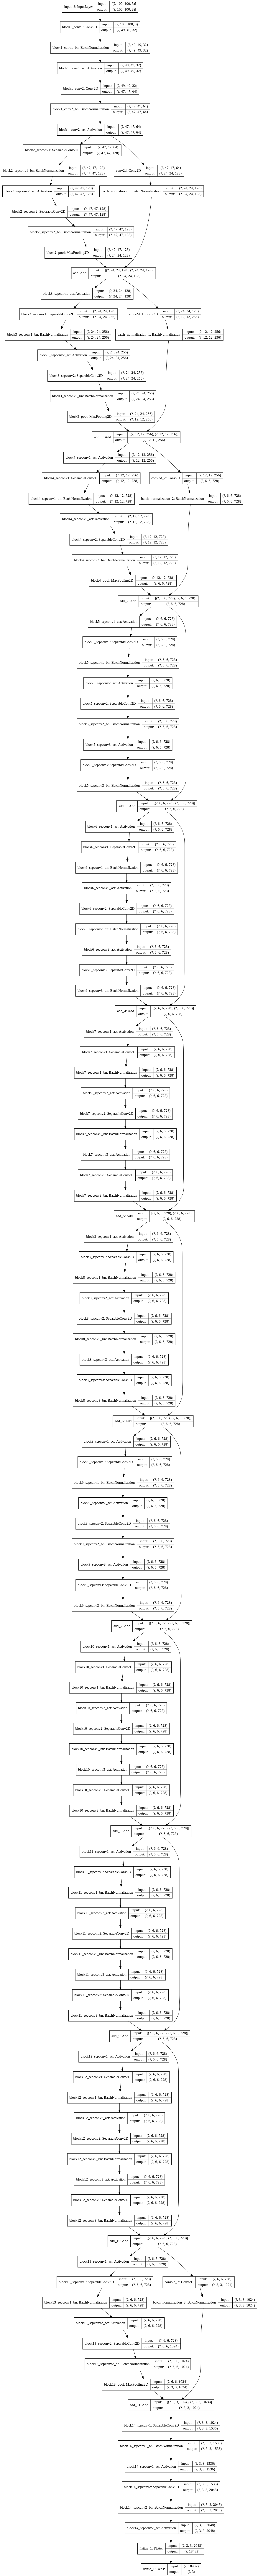

In [ ]:
keras.utils.plot_model(model,to_file='/content/drive/My Drive/CLASS Project/Xception.png',show_shapes=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset,label,stratify=label,test_size=0.1,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9307, 100, 100, 3)
(1035, 100, 100, 3)
(9307,)
(1035,)
(9307, 100, 100, 3)
(1035, 100, 100, 3)
(9307, 3)
(1035, 3)


In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(
  loss='categorical_crossentropy',
  optimizer=opt,
  metrics=['accuracy']
)

In [ ]:
hist=model.fit(X_train,y_train,epochs=20,validation_split=0.1,verbose=1)

Epoch 1/20
262/262 [==============================] - 7s 25ms/step - loss: 36.7539 - accuracy: 0.6645 - val_loss: 89.4199 - val_accuracy: 0.6380
Epoch 2/20
262/262 [==============================] - 6s 22ms/step - loss: 35.0442 - accuracy: 0.6707 - val_loss: 36.3577 - val_accuracy: 0.6982
Epoch 3/20
262/262 [==============================] - 6s 22ms/step - loss: 41.2473 - accuracy: 0.6593 - val_loss: 25.1011 - val_accuracy: 0.6971
Epoch 4/20
262/262 [==============================] - 6s 22ms/step - loss: 41.0293 - accuracy: 0.6657 - val_loss: 18.3235 - val_accuracy: 0.6982
Epoch 5/20
262/262 [==============================] - 6s 22ms/step - loss: 26.1482 - accuracy: 0.6652 - val_loss: 28.9527 - val_accuracy: 0.6982
Epoch 6/20
262/262 [==============================] - 6s 22ms/step - loss: 24.2697 - accuracy: 0.6743 - val_loss: 54.7326 - val_accuracy: 0.6982
Epoch 7/20
262/262 [==============================] - 6s 22ms/step - loss: 31.8427 - accuracy: 0.6713 - val_loss: 27.9716 - val_ac

In [ ]:
model.evaluate(X_test,y_test)

33/33 [==============================] - 1s 22ms/step - loss: 5.1849 - accuracy: 0.6725


[5.184903621673584, 0.6724637746810913]

In [ ]:
a=X_test[555]
print(a.shape)
a=np.expand_dims(a,0)

(100, 100, 3)


In [ ]:
y_test[555]

array([0., 0., 1.], dtype=float32)

In [ ]:
print(np.argmax(model.predict(a))+1)

2


In [ ]:
model.save('/content/drive/My Drive/CLASS Project/Xception.h5')

Text(0.5, 0, 'accuracy')

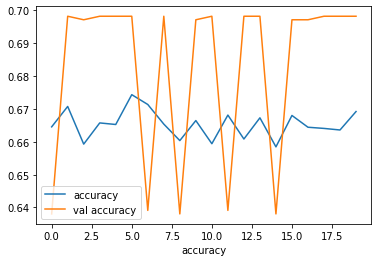

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'],label='val accuracy')
plt.legend()
plt.xlabel('accuracy')

Text(0.5, 0, 'loss')

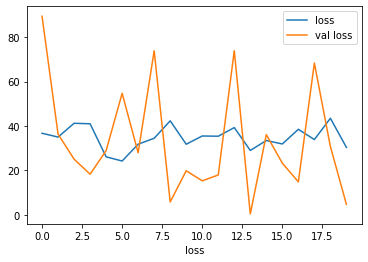

In [ ]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val loss')
plt.legend()
plt.xlabel('loss')